In [513]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import sklearn.model_selection as skl

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# device11
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [514]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

df_train = df_train.reset_index(drop=True)
df_train = df_train.drop(columns=['Id'])

# df_test = df_test.reset_index(drop=True)
# df_test = df_test.drop(columns=['Id'])

df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [515]:
df_test.columns, df_test.columns.shape

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

In [516]:
# Data cleaning
cols_dropped = []

# train
for col in df_train.columns:
    nan_percentage = (df_train[col].isna()==True).sum() * 100 / df_train.shape[0]
    if nan_percentage > 60.0:
        cols_dropped.insert(len(cols_dropped),col)
        df_train = df_train.drop(col, axis=1)

# test
for col in cols_dropped:
    df_test = df_test.drop(col, axis=1)

In [517]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [518]:
# handling categorical value
from sklearn.preprocessing import LabelEncoder

# TRAIN
le = LabelEncoder()
for col in df_train.columns:
#     print(df_train[col].dtype)
    if(df_train[col].dtype == "object"):
        df_train[col]=df_train[col].astype(str)
        df_train[col] = le.fit_transform(df_train[col])
    elif(df_train[col].dtype == "int"):
        df_train[col]=df_train[col].astype(float)
        df_train[col] = le.fit_transform(df_train[col])
    else:
        df_train[col].fillna(0,inplace=True)
        

df_train=df_train.astype(float)
print(df_train.isnull().sum().sum())

df_train = torch.tensor(np.array(df_train), dtype=torch.float32)

# TEST
for col in df_test.columns:
    if(col=="Id"): continue
#     print(df_test[col].dtype)
    if(df_test[col].dtype == "object"):
        df_test[col]=df_test[col].astype(str)
        df_test[col] = le.fit_transform(df_test[col])
    elif(df_test[col].dtype == "int"):
        df_test[col]=df_test[col].astype(float)
        df_test[col] = le.fit_transform(df_test[col])
    else:
        df_test[col].fillna(0,inplace=True)

df_test=df_test.astype(float)
print(df_test.isnull().sum().sum())
df_test.to_csv("new_df_test.csv")

df_test = torch.tensor(np.array(df_test), dtype=torch.float32)



0
0


In [519]:
df_train

tensor([[  5.,   3.,  65.,  ...,   8.,   4., 412.],
        [  0.,   3.,  80.,  ...,   8.,   4., 339.],
        [  5.,   3.,  68.,  ...,   8.,   4., 442.],
        ...,
        [  6.,   3.,  66.,  ...,   8.,   4., 527.],
        [  0.,   3.,  68.,  ...,   8.,   4., 199.],
        [  0.,   3.,  75.,  ...,   8.,   4., 221.]])

In [520]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(NeuralNet, self).__init__()
        
        layers = []
        
        # Adding the first hidden layer and its activation
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        
        # Adding the subsequent hidden layers and their activations
        for i in range(1, len(hidden_sizes)):
            layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            layers.append(nn.ReLU())
        
        # Adding the output layer
        layers.append(nn.Linear(hidden_sizes[-1], num_classes))
        
        # Combining all layers into a sequential container
        self.all_layers = nn.Sequential(*layers)
        
    def forward_propagation(self, x):
        return self.all_layers(x)

    def compute_l2_loss(self, w):
          return torch.square(w).sum()

def one_hot_vec(index, cols, rows):
    res = torch.zeros(rows, cols)
    for i in range(index.shape[0]):
        res[i,index[i]]=1
    return res

In [528]:
# Hyper-parameters
input_size = 75
hidden_sizes = [32,16,8]
output_y = 1
num_epochs = 300
learning_rate = 0.001
batch_size = 100
weight_decay = 1e-5


# model
model = NeuralNet(input_size, hidden_sizes, output_y).to(device)

# loss and optimizer
loss_fn = nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

losses = []

# data loader for iteration
train_loader = torch.utils.data.DataLoader(dataset=df_train,batch_size=batch_size,shuffle=False)


# Train model
total_steps = len(train_loader)

for epoch in range(num_epochs):
    # each iteration will give a batch of points 
    tot_avg_loss = 0
    
    for i,data in enumerate(train_loader): 
        points = data[:, 0:75].clone().detach().float().to(device)
        outputs = data[:,75].clone().detach().float().reshape(-1,1).to(device)

        # forward prop
        outputs_ = model.forward_propagation(points)
        loss = loss_fn(outputs_, outputs)
        
        # Compute l2 loss component
        l2_weight = 1.0
        l2_parameters = []
        for parameter in model.parameters():
            l2_parameters.append(parameter.view(-1))
        l2 = l2_weight * model.compute_l2_loss(torch.cat(l2_parameters))
      
        # Add l2 loss component
        loss += l2

        # backward prop and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        tot_avg_loss += loss.item()

    
    tot_avg_loss /= train_loader.dataset.shape[0] 
    tot_avg_loss = torch.sqrt(torch.Tensor([tot_avg_loss])) 
    losses.append(tot_avg_loss.item())
    
    print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {tot_avg_loss}')



Epoch [1/300], Loss: tensor([314.5057])
Epoch [2/300], Loss: tensor([256.1664])
Epoch [3/300], Loss: tensor([166.8314])
Epoch [4/300], Loss: tensor([126.8241])
Epoch [5/300], Loss: tensor([114.8746])
Epoch [6/300], Loss: tensor([107.0676])
Epoch [7/300], Loss: tensor([99.7493])
Epoch [8/300], Loss: tensor([94.4554])
Epoch [9/300], Loss: tensor([90.1988])
Epoch [10/300], Loss: tensor([86.6249])
Epoch [11/300], Loss: tensor([83.8693])
Epoch [12/300], Loss: tensor([81.4554])
Epoch [13/300], Loss: tensor([79.6984])
Epoch [14/300], Loss: tensor([78.1917])
Epoch [15/300], Loss: tensor([77.0359])
Epoch [16/300], Loss: tensor([75.8992])
Epoch [17/300], Loss: tensor([75.0326])
Epoch [18/300], Loss: tensor([74.1753])
Epoch [19/300], Loss: tensor([73.5203])
Epoch [20/300], Loss: tensor([72.8412])
Epoch [21/300], Loss: tensor([72.2626])
Epoch [22/300], Loss: tensor([71.6567])
Epoch [23/300], Loss: tensor([71.1379])
Epoch [24/300], Loss: tensor([70.6036])
Epoch [25/300], Loss: tensor([70.1114])
Epo

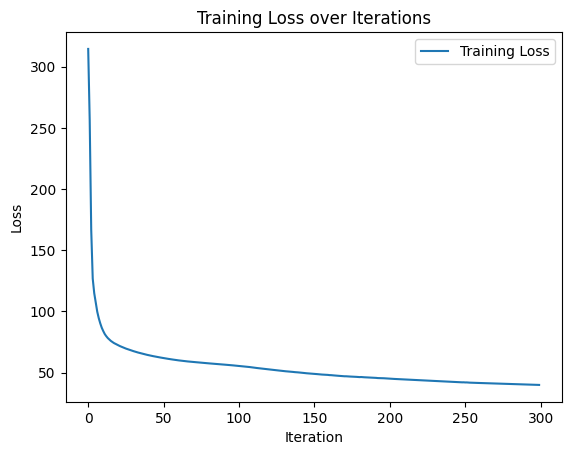

In [529]:
    
# Plotting loss
plt.figure()
plt.plot(range(len(losses)), losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss over Iterations')
plt.show()
    

In [530]:
df_test.shape

torch.Size([1459, 76])

In [531]:

# Evaluate the model and collect predictions
pred_y = []
ids = []

total_loss = 0

# data loader for iteration
test_loader = torch.utils.data.DataLoader(dataset=df_test,batch_size=batch_size,shuffle=False)

with torch.no_grad():
    for i, data in enumerate(test_loader): 
        iid = data[:,0].clone().detach().float().to(device)
        points = data[:, 1:76].clone().detach().float().to(device)

        outputs_ = model.forward_propagation(points)
        
        # Collect data for plotting
        ids.append(iid.cpu())
        pred_y.append(outputs_.cpu())


In [532]:
ids = [item for tensor in ids for item in tensor.tolist()]
pred_y = [item[0] for tensor in pred_y for item in tensor.tolist()]

In [533]:
res = {"Id": ids, "SalePrice": pred_y}
res = pd.DataFrame(res)
res.to_csv("submission.csv")